In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Get the feature names and their types
feature_types = df.dtypes
print("Features and their types:")
print(feature_types)

Features and their types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


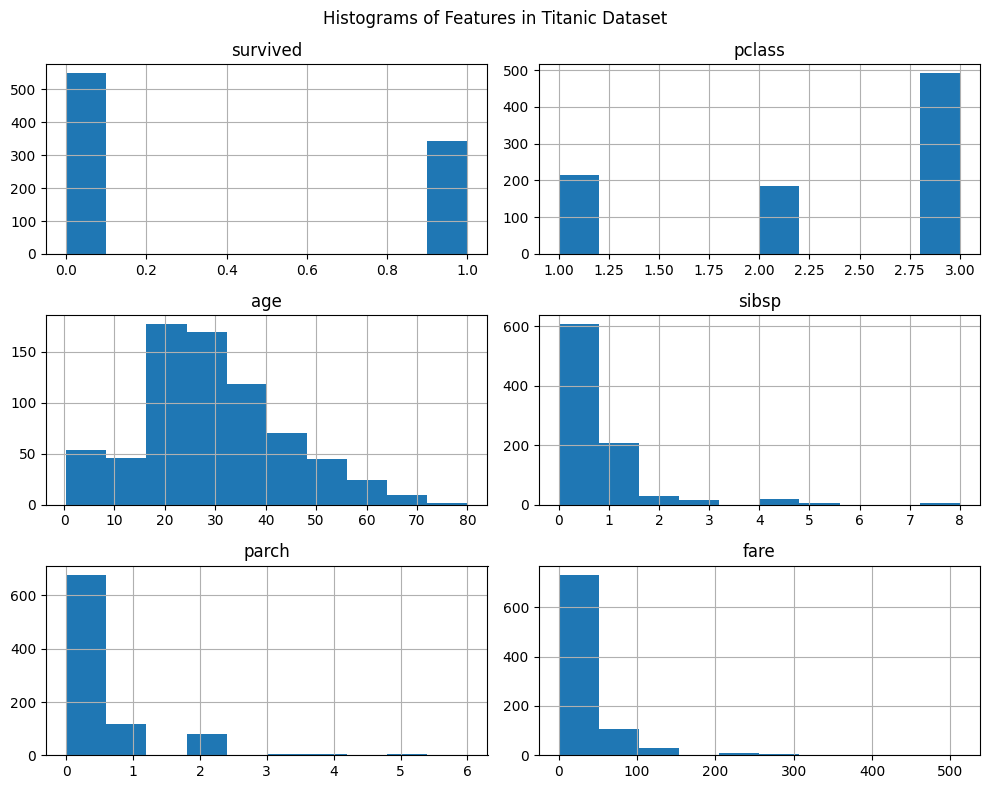

In [6]:


# Plot histograms for each feature
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Features in Titanic Dataset')
plt.tight_layout()
plt.show()

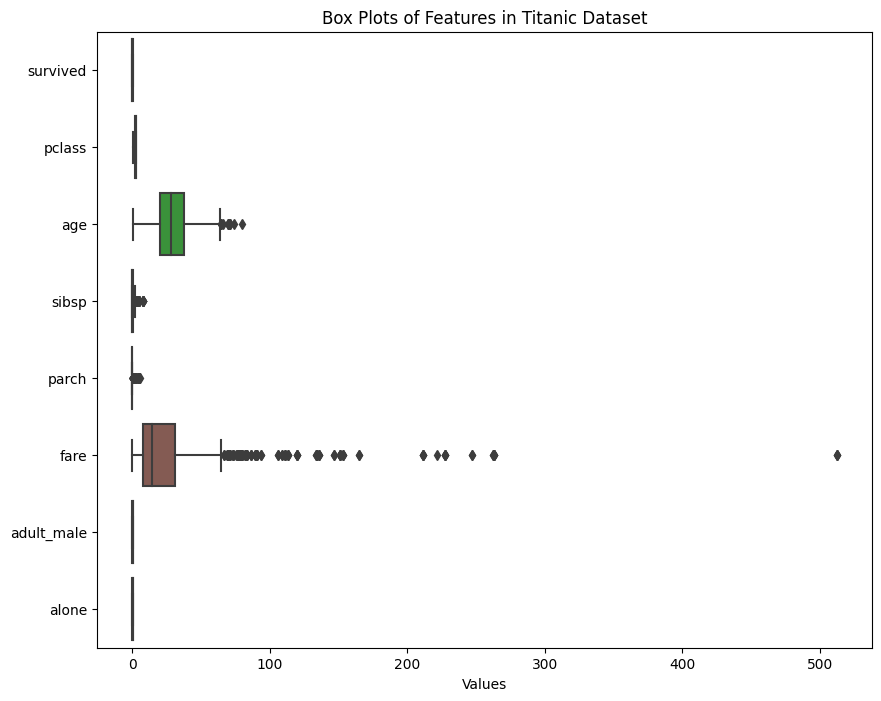

In [7]:
# Plot box plots for each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient='h')
plt.title('Box Plots of Features in Titanic Dataset')
plt.xlabel('Values')
plt.show()

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

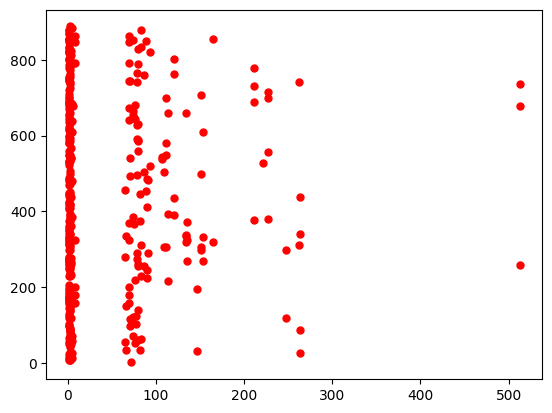

In [9]:
# Identify and highlight outliers
outliers = {}
for column in df.columns:
    if df[column].dtype != 'object':
        # Calculate the interquartile range (IQR)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine the outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find the outliers for the current feature
        feature_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers[column] = feature_outliers

        # Highlight the outliers in the plot
        outlier_indexes = feature_outliers.index.tolist()
        plt.plot(feature_outliers[column], outlier_indexes, 'ro', markersize=5)
plt.show()


In [10]:
# Display the outliers
print("Outliers:")
for column, outlier_data in outliers.items():
    if not outlier_data.empty:
        print(f"\nFeature: {column}")
        print(outlier_data)


Outliers:

Feature: age
     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
33          0       2  male  66.0      0      0  10.5000        S  Second   
54          0       1  male  65.0      0      1  61.9792        C   First   
96          0       1  male  71.0      0      0  34.6542        C   First   
116         0       3  male  70.5      0      0   7.7500        Q   Third   
280         0       3  male  65.0      0      0   7.7500        Q   Third   
456         0       1  male  65.0      0      0  26.5500        S   First   
493         0       1  male  71.0      0      0  49.5042        C   First   
630         1       1  male  80.0      0      0  30.0000        S   First   
672         0       2  male  70.0      0      0  10.5000        S  Second   
745         0       1  male  70.0      1      1  71.0000        S   First   
851         0       3  male  74.0      0      0   7.7750        S   Third   

     who  adult_male deck  embark_town alive  alone